## My Hello Word
##### Pytorch, Pandas


This is my first notebook. I will update along the way!


I have taken several cells from here! Please check them out!

1. https://www.kaggle.com/frtgnn/titanic-survival-classifier

2. https://www.kaggle.com/frtgnn/beginner-s-stop-pipeline-introduction

3. https://www.kaggle.com/frtgnn/introduction-to-pytorch-a-very-gentle-start

# DataSet & Library Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_sub   = pd.read_csv('gender_submission.csv')

In [2]:
#general look on the data
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Data

**Base on above information, [Age, Cabin, Embarked] contains NULL values, we need to be fill them or delte them so we can integrate them into our model**


data with object type will need to be modified.


In [7]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation matrix')

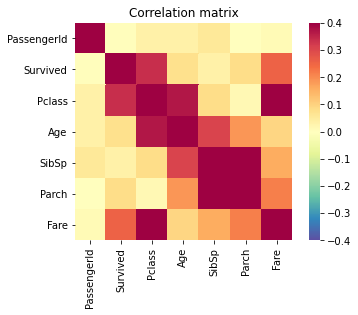

In [8]:
corrs = df_train.corr().abs()

sns.heatmap(corrs, cmap='Spectral_r', square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

definitely inspired by the following Notebook
https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

Base on Kaggle and various sites, we all know there are various way to deal with missing value.

One of the first fundemental way is check the correlation between the variables. We will fill the missing age base on the median age of that group of (Sex and PClass).  



In [9]:
df_train[df_train['Age'].isnull()].sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q


In [10]:
df_train.groupby(['Sex', 'Pclass']).mean()['Age']


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [11]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Fare']= df_test['Fare'].fillna(df_test['Fare'].mean())

In [12]:
# There are only two cases with missing Embarked, we can ignored it
# OR 
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


When I googled **Stone, Mrs. George Nelson (Martha Evelyn)**, I found that she embarked from **S (Southampton)** with her maid **Amelie Icard**, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

Missing values in `Embarked` are filled with **S** with this information.

In [13]:
# Filling the missing values in Embarked with S
df_train['Embarked'] = df_train['Embarked'].fillna('S')

Now we have Cabin left to take care of it. 

#### Cabin
The large portion of the `Cabin` feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the `Cabin` values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)
* On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
* **A**, **B** and **C** decks were only for 1st class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers
* From going **A** to **G**, distance to the staircase increases which might be a factor of survival

For Now i will drop it, I will come back for more feature engineer base on existing kaggler documents

In [14]:
# df_train = df_train.drop(columns='Deck')
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

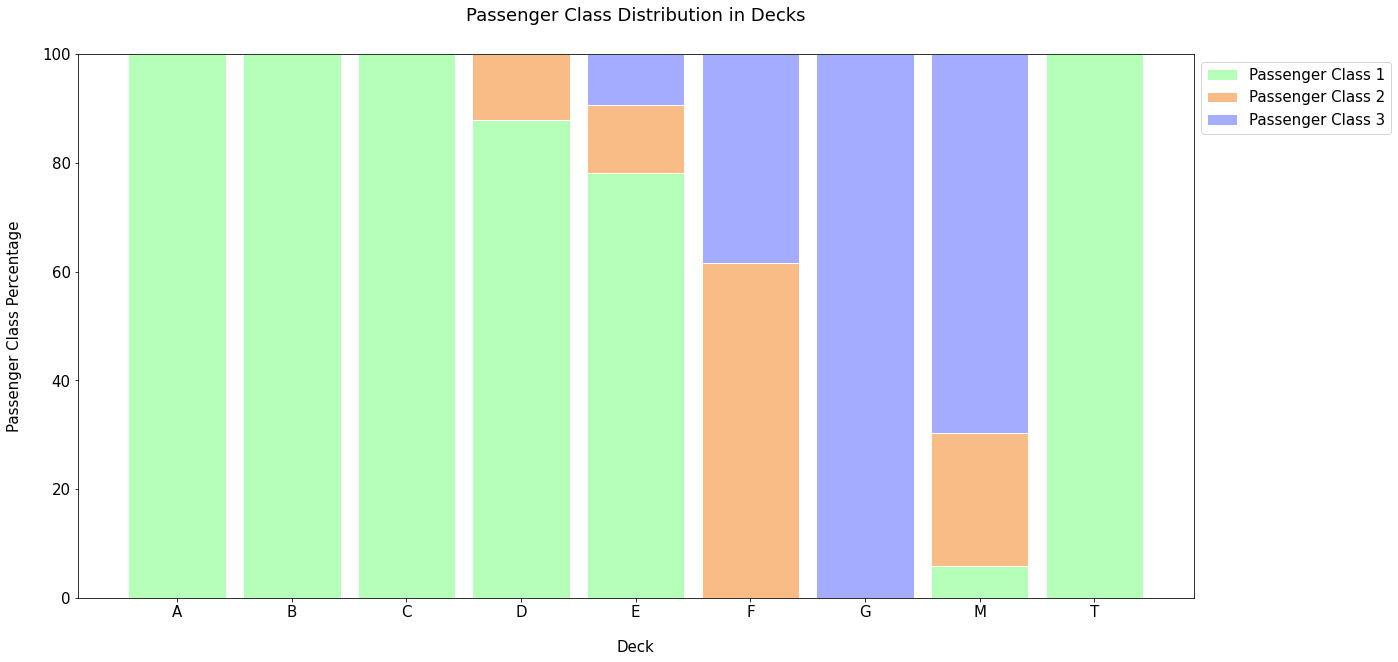

In [15]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_train['Deck'] = df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_train.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

(https://www.kaggle.com/titanic-advanced-feature-engineering-tutorial)
* **100%** of **A**, **B** and **C** decks are 1st class passengers
* Deck **D** has **87%** 1st class and **13%** 2nd class passengers
* Deck **E** has **83%** 1st class, **10%** 2nd class and **7%** 3rd class passengers
* Deck **F** has **62%** 2nd class and **38%** 3rd class passengers
* **100%** of **G** deck are 3rd class passengers
* There is one person on the boat deck in **T** cabin and he is a 1st class passenger. **T** cabin passenger has the closest resemblance to **A** deck passengers so he is grouped with **A** deck
* Passengers labeled as **M** are the missing values in `Cabin` feature. I don't think it is possible to find those passengers' real `Deck` so I decided to use **M** like a deck

In [16]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_train['Deck'] = df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_test['Deck'] = df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [17]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

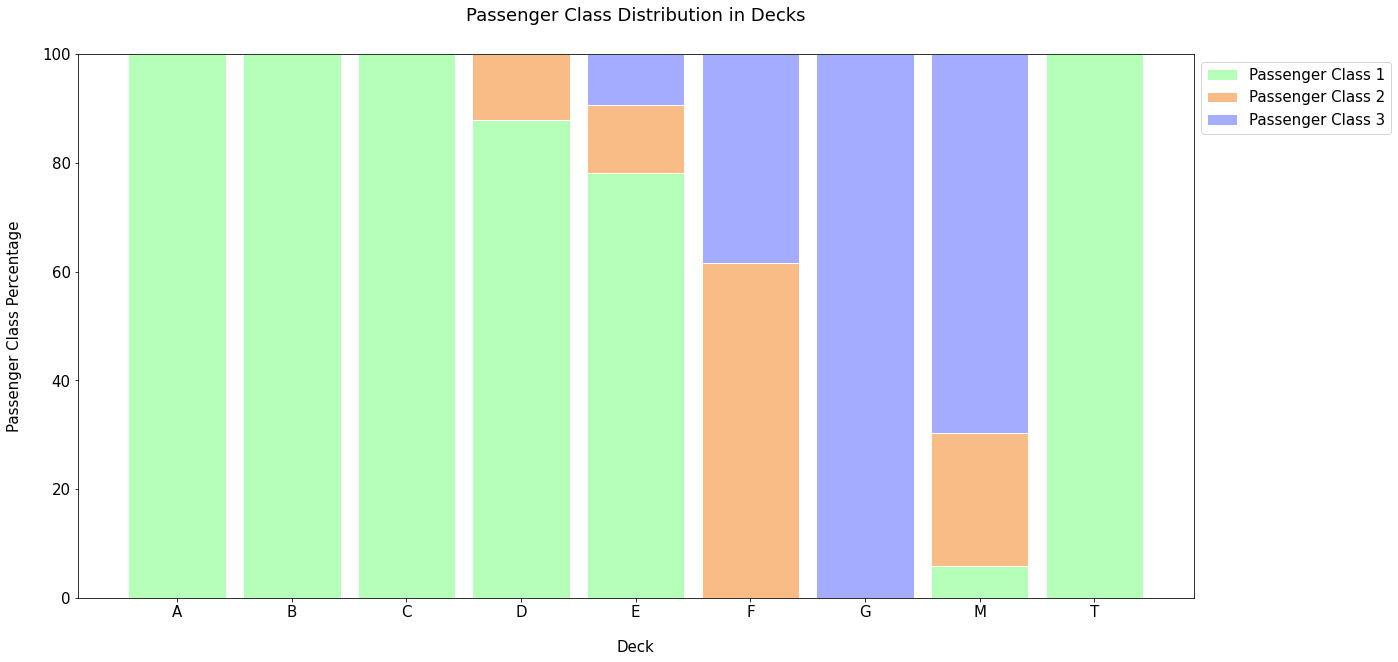

In [18]:
df_all_decks = df_train.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [19]:
# Passenger in the T deck is changed to A
idx = df_train[df_train['Deck'] == 'T'].index
df_train.loc[idx, 'Deck'] = 'A'

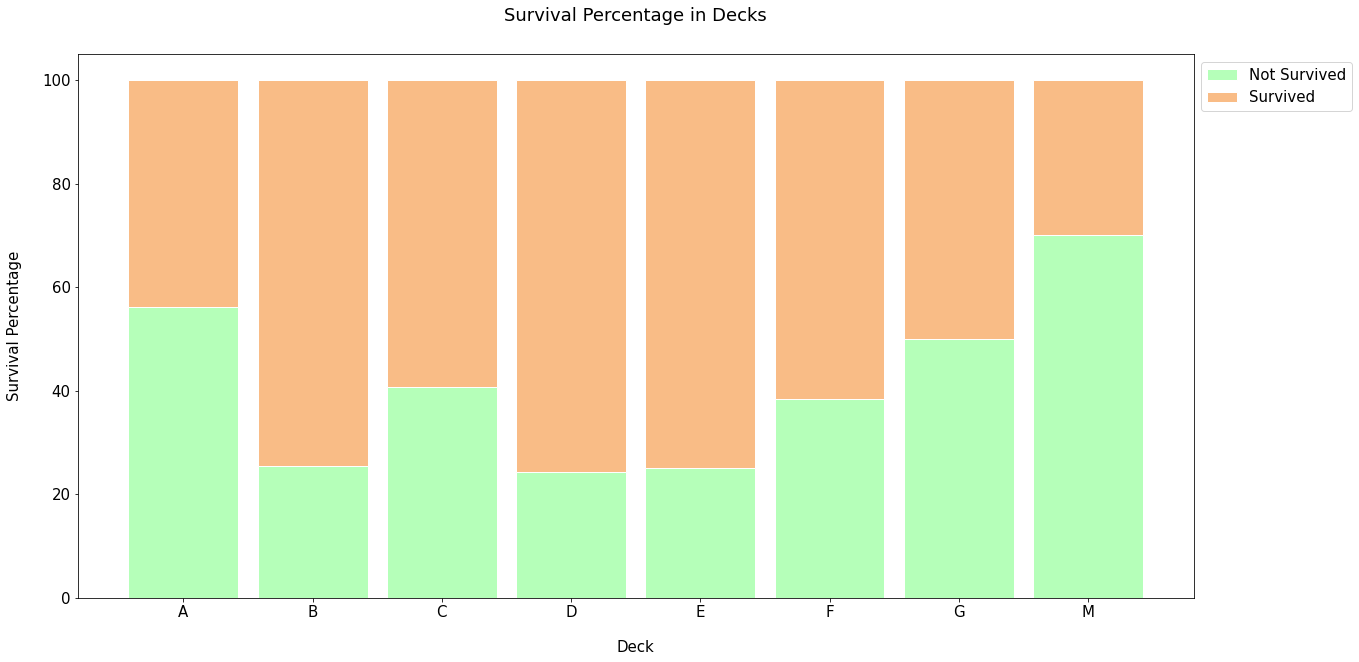

In [20]:
df_all_decks_survived = df_train.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

(https://www.kaggle.com/franklinshih0617/titanic-advanced-feature-engineering-tutorial/edit)

Golden piece of referenced notebook on feature engineering.

As I suspected, every deck has different survival rates and that information can't be discarded. Deck **B**, **C**, **D** and **E** have the highest survival rates. Those decks are mostly occupied by 1st class passengers. **M** has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers. To conclude, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. In my opinion **M** (Missing `Cabin` values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as **M** is a reasonable way to handle the missing data. It is a unique group with shared characteristics. `Deck` feature has high-cardinality right now so some of the values are grouped with each other based on their similarities.
* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
* **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
* **F** and **G** decks are labeled as **FG** because of the same reason above
* **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [21]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [22]:
df_train['Deck'] = df_train['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_train['Deck'] = df_train['Deck'].replace(['D', 'E'], 'DE')
df_train['Deck'] = df_train['Deck'].replace(['F', 'G'], 'FG')

df_train['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

In [23]:
df_test['Deck'] = df_test['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_test['Deck'] = df_test['Deck'].replace(['D', 'E'], 'DE')
df_test['Deck'] = df_test['Deck'].replace(['F', 'G'], 'FG')

df_test['Deck'].value_counts()

M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64

# Making the dataset ready for the model

- let's drop the unnecessary columns
- encode the categorical (no details)
- impute the necessary columns (again no details)
- split the data for the model

In [24]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
Deck = pd.get_dummies(df_train['Deck'],drop_first=True)
df_train = pd.concat([df_train,Deck,sex,embark],axis=1)

In [25]:
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)
Deck = pd.get_dummies(df_test['Deck'],drop_first=True)
df_test = pd.concat([df_test,Deck,sex,embark],axis=1)

In [26]:
df_train.drop(['PassengerId','Name','Deck','Sex','Embarked','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['Name','Deck','Sex','Embarked','Ticket','Cabin'],axis=1,inplace=True)
X_test_passengers = df_test['PassengerId']
df_test = df_train.drop('PassengerId',axis=1)


In [28]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   DE        891 non-null    uint8  
 7   FG        891 non-null    uint8  
 8   M         891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  Q         891 non-null    uint8  
 11  S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 47.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64 

In [29]:
df_train.shape

(891, 12)

In [30]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_train.drop('Survived',axis=1).values,
                                                    df_train['Survived'].values, test_size=0.2,
                                                    random_state=33)


In [31]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [32]:
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y)
y_test = torch.LongTensor(test_y)

In [33]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 712
Labels: tensor([0, 1])
Counts: tensor([442, 270])


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11, 30)
        self.fc2 = nn.Linear(30, 30)
        self.out = nn.Linear(30, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.out(x))
        return x
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=11, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=2, bias=True)
)


In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [36]:
batch_size = 64
n_epochs = 500
batch_no = len(X_train) // batch_size

train_loss = 0
train_loss_min = np.Inf
for epoch in range(n_epochs):
    for i in range(batch_no):
        start = i*batch_size
        end = start+batch_size
        x_var = Variable(torch.FloatTensor(X_train[start:end]))
        y_var = Variable(torch.LongTensor(y_train[start:end])) 
        
        optimizer.zero_grad()
        output = model(x_var)
        loss = criterion(output,y_var)
        loss.backward()
        optimizer.step()
        
        values, labels = torch.max(output, 1)
        num_right = np.sum(labels.data.numpy() == y_train[start:end].numpy())

        train_loss += loss.item()*batch_size

        train_loss = train_loss / len(X_train)
        if train_loss <= train_loss_min:
            print("Validation loss decreased ({:6f} ===> {:6f}). Saving the model...".format(train_loss_min,train_loss))
            torch.save(model.state_dict(), "model.pt")
            train_loss_min = train_loss

    if epoch % 200 == 0:
        print('')
        print("Epoch: {} \tTrain Loss: {} \tTrain Accuracy: {}".format(epoch+1, train_loss,num_right / len(y_train[start:end]) ))
print('Training Ended! ')

/Users/franklinshih/anaconda3/envs/pyfinance/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Validation loss decreased (   inf ===> 0.059072). Saving the model...
Validation loss decreased (0.059072 ===> 0.058506). Saving the model...
Validation loss decreased (0.058506 ===> 0.047354). Saving the model...

Epoch: 1 	Train Loss: 0.04882844093892321 	Train Accuracy: 0.796875
Validation loss decreased (0.047354 ===> 0.046821). Saving the model...
Validation loss decreased (0.046821 ===> 0.046778). Saving the model...
Validation loss decreased (0.046778 ===> 0.045853). Saving the model...
Validation loss decreased (0.045853 ===> 0.044941). Saving the model...
Validation loss decreased (0.044941 ===> 0.043426). Saving the model...
Validation loss decreased (0.043426 ===> 0.041630). Saving the model...
Validation loss decreased (0.041630 ===> 0.041423). Saving the model...
Validation loss decreased (0.041423 ===> 0.040517). Saving the model...
Validation loss decreased (0.040517 ===> 0.039798). Saving the model...
Validation loss decreased (0.039798 ===> 0.038537). Saving the model.

In [45]:
# Evaluate the model

test_var = Variable(torch.FloatTensor(test_X), requires_grad=True)
with torch.no_grad():
    result = model(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == test_y)
print('Accuracy {:.2f}'.format(num_right / len(test_y)))

Accuracy 0.79


In [55]:
df_test.values

array([[ 3. , 34.5,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 24. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 24. ,  1. , ...,  1. ,  0. ,  0. ]])

In [56]:
# Applying model on the test data
X_test_var = Variable(torch.FloatTensor(df_test.values), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()


/Users/franklinshih/anaconda3/envs/pyfinance/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [57]:
survived.shape

(418,)

In [58]:
import csv

submission = [['PassengerId', 'Survived']]
for i in range(len(survived)):
    submission.append([X_test_passengers[i], survived[i]])

[['PassengerId', 'Survived'],
 [892, 0],
 [893, 0],
 [894, 0],
 [895, 0],
 [896, 0],
 [897, 0],
 [898, 1],
 [899, 0],
 [900, 1],
 [901, 0],
 [902, 0],
 [903, 0],
 [904, 1],
 [905, 0],
 [906, 1],
 [907, 1],
 [908, 0],
 [909, 0],
 [910, 0],
 [911, 1],
 [912, 0],
 [913, 1],
 [914, 1],
 [915, 0],
 [916, 0],
 [917, 0],
 [918, 1],
 [919, 0],
 [920, 0],
 [921, 0],
 [922, 0],
 [923, 0],
 [924, 0],
 [925, 0],
 [926, 0],
 [927, 0],
 [928, 0],
 [929, 0],
 [930, 0],
 [931, 1],
 [932, 0],
 [933, 0],
 [934, 0],
 [935, 1],
 [936, 1],
 [937, 0],
 [938, 0],
 [939, 0],
 [940, 1],
 [941, 0],
 [942, 0],
 [943, 0],
 [944, 0],
 [945, 1],
 [946, 0],
 [947, 0],
 [948, 0],
 [949, 0],
 [950, 0],
 [951, 1],
 [952, 0],
 [953, 0],
 [954, 0],
 [955, 1],
 [956, 1],
 [957, 1],
 [958, 1],
 [959, 0],
 [960, 0],
 [961, 0],
 [962, 1],
 [963, 0],
 [964, 1],
 [965, 1],
 [966, 1],
 [967, 1],
 [968, 0],
 [969, 1],
 [970, 0],
 [971, 1],
 [972, 1],
 [973, 0],
 [974, 0],
 [975, 0],
 [976, 0],
 [977, 0],
 [978, 1],
 [979, 0],
 [

In [60]:
with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission)
    
print('Writing Complete!')

Writing Complete!
